Found 272 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.5617 - auc: 0.6046 - loss: 6.6434 - precision: 0.5781 - recall: 0.5566 - val_accuracy: 0.5319 - val_auc: 0.5851 - val_loss: 6.5038 - val_precision: 0.5333 - val_recall: 0.3478 - learning_rate: 1.0000e-04
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.5586 - auc: 0.5834 - loss: 6.6192 - precision: 0.5366 - recall: 0.5943 - val_accuracy: 0.5532 - val_auc: 0.6449 - val_loss: 6.4302 - val_precision: 0.6250 - val_recall: 0.2174 - learning_rate: 1.0000e-04
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.6471 - auc: 0.6908 - loss: 6.3911 - precision: 0.6676 - recall: 0.6225 - val_accuracy: 0.5957 - val_auc: 0.7283 - val_loss: 6.3269 - val_precision: 1.0000 - val_recall: 0.1739 - learning_rate: 1.0000e-04
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.6403 - auc: 0.6892 - loss: 6.3728 - precision: 0.6540 - recall: 0.6496 - val_accuracy: 0.6170 - val_auc: 0.8080 - val_loss: 6.2333 - val_precisio

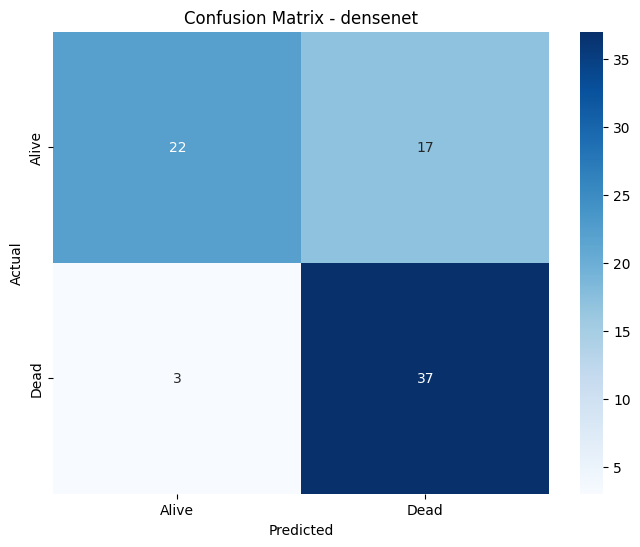

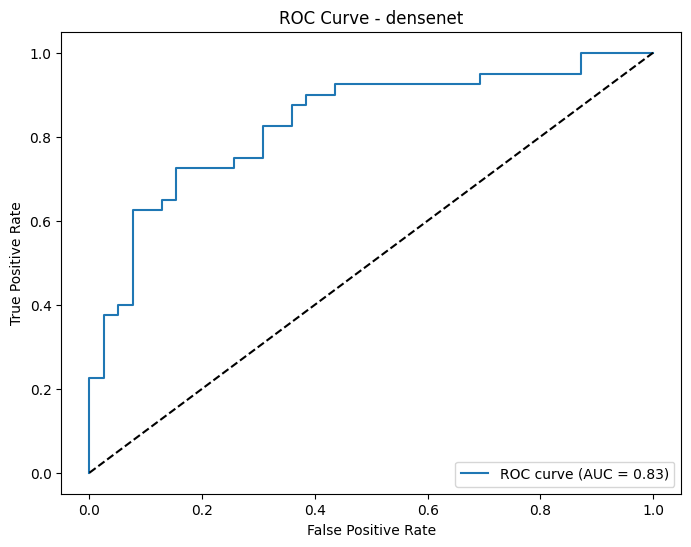

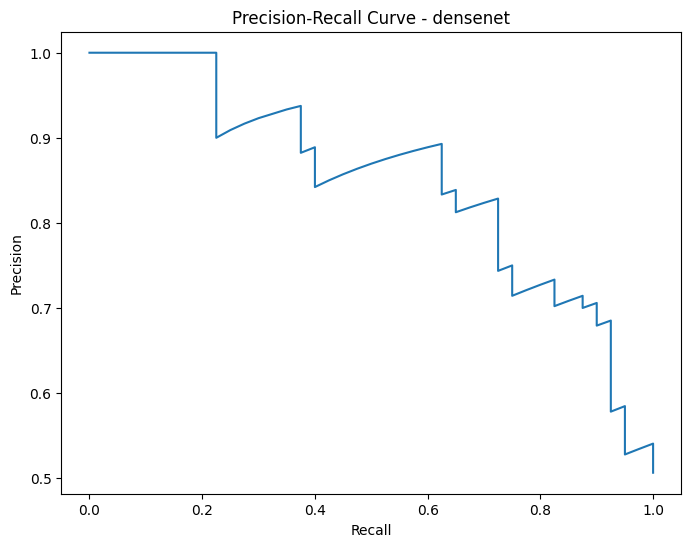

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.4989 - auc_1: 0.5317 - loss: 6.9857 - precision_1: 0.5252 - recall_1: 0.5031 - val_accuracy: 0.5745 - val_auc_1: 0.6504 - val_loss: 6.7584 - val_precision_1: 0.5484 - val_recall_1: 0.7391 - learning_rate: 1.0000e-04
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 396ms/step - accuracy: 0.6696 - auc_1: 0.7233 - loss: 6.7445 - precision_1: 0.7147 - recall_1: 0.6425 - val_accuracy: 0.6809 - val_auc_1: 0.8415 - val_loss: 6.6750 - val_precision_1: 0.6250 - val_recall_1: 0.8696 - learning_rate: 1.0000e-04
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 337ms/step - accuracy: 0.7153 - auc_1: 0.7805 - loss: 6.6465 - precision_1: 0.7475 - recall_1: 0.7091 - val_accuracy: 0.7660 - val_auc_1: 0.8560 - val_loss: 6.6239 - val_precision_1: 0.7308 - val_recall_1: 0.8261 - learning_rate: 1.0000e-04
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - accuracy: 0.7340 - auc_1: 0.7962 - loss: 6.5943 - precision

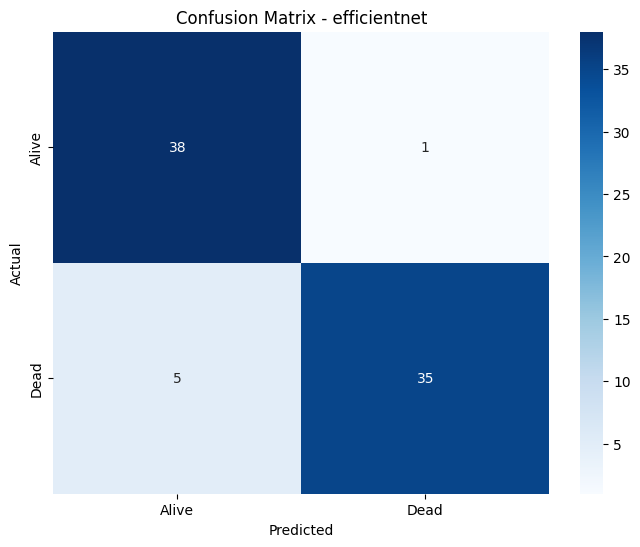

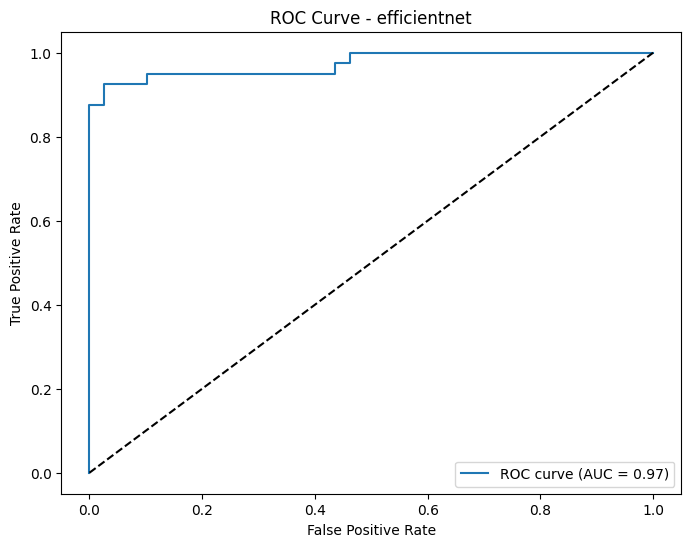

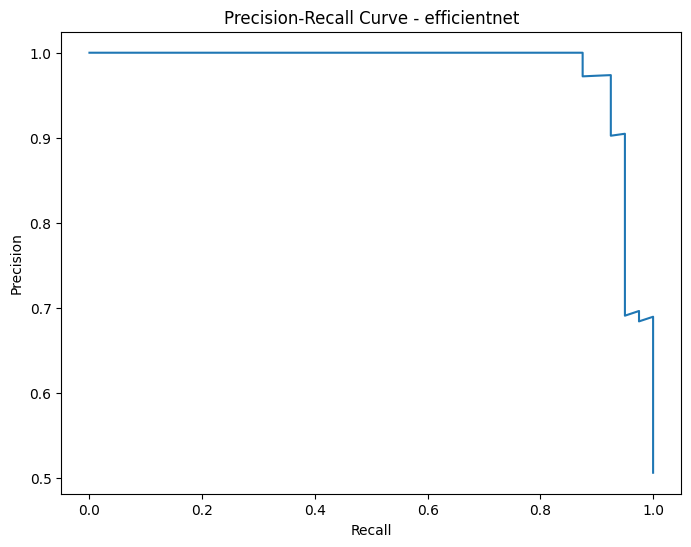


Model Comparison:
                accuracy  precision  recall        f1       auc
DenseNet     0  0.746835   0.685185   0.925  0.787234  0.833974
EfficientNet 0  0.924051   0.972222   0.875  0.921053  0.973718
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
densenet Prediction: Dead (Probability: 0.54)
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
efficientnet Prediction: Alive (Probability: 0.11)


In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve
)
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, EfficientNetB3
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

class RoadkillDetector:
    def __init__(self, img_size=(224, 224), batch_size=32):
        self.img_size = img_size
        self.batch_size = batch_size
        self.models = {}
        self.histories = {}
        
        # Define paths as in original code
        self.dataset_dir = "/kaggle/input/roadkill-hotspot-and-policy-advocacy/RHP"
        self.train_dir = "/kaggle/working/train"
        self.test_dir = "/kaggle/working/test"

    def setup_directories(self):
        """Create necessary directories for training and testing"""
        os.makedirs(self.train_dir, exist_ok=True)
        os.makedirs(self.test_dir, exist_ok=True)
        
        for category in ["dead", "alive"]:
            os.makedirs(os.path.join(self.train_dir, category), exist_ok=True)
            os.makedirs(os.path.join(self.test_dir, category), exist_ok=True)

    def prepare_data(self):
        """Prepare and split the dataset"""
        self.setup_directories()
        
        # Get all images
        dead_images = [os.path.join(self.dataset_dir, "dead", img) 
                      for img in os.listdir(os.path.join(self.dataset_dir, "dead"))]
        alive_images = [os.path.join(self.dataset_dir, "alive", img) 
                       for img in os.listdir(os.path.join(self.dataset_dir, "alive"))]

        # Split dataset
        train_dead, test_dead = train_test_split(dead_images, test_size=0.2, random_state=42)
        train_alive, test_alive = train_test_split(alive_images, test_size=0.2, random_state=42)

        # Move images to respective directories
        self._move_images(train_dead, os.path.join(self.train_dir, "dead"))
        self._move_images(test_dead, os.path.join(self.test_dir, "dead"))
        self._move_images(train_alive, os.path.join(self.train_dir, "alive"))
        self._move_images(test_alive, os.path.join(self.test_dir, "alive"))

        # Setup data generators
        datagen = ImageDataGenerator(
            preprocessing_function=preprocess_input,
            validation_split=0.15,
            rotation_range=30,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        self.train_generator = datagen.flow_from_directory(
            self.train_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='binary',
            subset='training'
        )

        self.val_generator = datagen.flow_from_directory(
            self.train_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='binary',
            subset='validation'
        )

        self.test_generator = ImageDataGenerator(
            preprocessing_function=preprocess_input
        ).flow_from_directory(
            self.test_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='binary',
            shuffle=False
        )

    @staticmethod
    def _move_images(image_list, destination_folder):
        """Helper method to move images to their respective directories"""
        for img_path in image_list:
            shutil.copy(img_path, os.path.join(destination_folder, os.path.basename(img_path)))

    def build_model(self, model_name, base_model):
        """Build and compile the model"""
        base_model.trainable = False
        
        inputs = tf.keras.Input(shape=(*self.img_size, 3))
        x = base_model(inputs)
        x = GlobalAveragePooling2D()(x)
        x = BatchNormalization()(x)
        x = Dropout(0.4)(x)
        x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)
        
        model = tf.keras.Model(inputs, outputs)
        model.compile(
            optimizer=Adam(learning_rate=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
        )
        
        self.models[model_name] = model
        return model

    def train(self, model_name, epochs=20):
        """Train the model"""
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=3,
                min_lr=1e-6
            ),
            ModelCheckpoint(
                f'/kaggle/working/best_{model_name}.keras',  # Changed from .h5 to .keras
                monitor='val_loss',
                save_best_only=True
            )
        ]
        
        history = self.models[model_name].fit(
            self.train_generator,
            validation_data=self.val_generator,
            epochs=epochs,
            callbacks=callbacks
        )
        
        self.histories[model_name] = history
        return history


    def evaluate(self, model_name):
        """Evaluate the model and generate performance metrics"""
        model = self.models[model_name]
        y_true = self.test_generator.classes
        y_pred_probs = model.predict(self.test_generator)
        y_pred = (y_pred_probs > 0.5).astype(int).flatten()
        
        # Calculate metrics
        results = {
            'accuracy': accuracy_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'recall': recall_score(y_true, y_pred),
            'f1': f1_score(y_true, y_pred),
            'auc': roc_auc_score(y_true, y_pred_probs)
        }
        
        # Plot confusion matrix
        self._plot_confusion_matrix(y_true, y_pred, model_name)
        
        # Plot ROC curve
        self._plot_roc_curve(y_true, y_pred_probs, model_name)
        
        # Plot precision-recall curve
        self._plot_precision_recall_curve(y_true, y_pred_probs, model_name)
        
        return pd.DataFrame([results])

    def predict_image(self, image_path, model_name):
        """Predict the status of a single image"""
        model = self.models[model_name]
        img = image.load_img(image_path, target_size=self.img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        prediction = model.predict(img_array)[0][0]
        status = "Dead" if prediction > 0.5 else "Alive"
        print(f"{model_name} Prediction: {status} (Probability: {prediction:.2f})")
        return status, prediction

    def _plot_confusion_matrix(self, y_true, y_pred, model_name):
        """Plot confusion matrix"""
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=["Alive", "Dead"],
            yticklabels=["Alive", "Dead"]
        )
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.savefig(f'/kaggle/working/confusion_matrix_{model_name}.png')
        plt.show()

    def _plot_roc_curve(self, y_true, y_pred_probs, model_name):
        """Plot ROC curve"""
        fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc='lower right')
        plt.savefig(f'/kaggle/working/roc_curve_{model_name}.png')
        plt.show()

    def _plot_precision_recall_curve(self, y_true, y_pred_probs, model_name):
        """Plot precision-recall curve"""
        precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.savefig(f'/kaggle/working/pr_curve_{model_name}.png')
        plt.show()

# Main execution
if __name__ == "__main__":
    # Initialize detector
    detector = RoadkillDetector()
    
    # Prepare data
    detector.prepare_data()
    
    # Train and evaluate DenseNet
    detector.build_model('densenet', DenseNet121(weights='imagenet', include_top=False))
    detector.train('densenet')
    densenet_results = detector.evaluate('densenet')
    
    # Train and evaluate EfficientNet
    detector.build_model('efficientnet', EfficientNetB3(weights='imagenet', include_top=False))
    detector.train('efficientnet')
    efficientnet_results = detector.evaluate('efficientnet')
    
    # Compare results
    results_comparison = pd.concat(
        [densenet_results, efficientnet_results],
        keys=['DenseNet', 'EfficientNet']
    )
    print("\nModel Comparison:")
    print(results_comparison)
    
    # Save comparison results
    results_comparison.to_csv('/kaggle/working/model_comparison_results.csv')
    
    # Example of single image prediction
    test_image_path = "/kaggle/working/test/alive/8.jpeg"
    detector.predict_image(test_image_path, 'densenet')
    detector.predict_image(test_image_path, 'efficientnet')

In [2]:
# For DenseNet Model
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

def predict_with_densenet(image_path):
    """
    Predict using saved DenseNet model
    """
    # Load the model
    model = load_model('/kaggle/working/best_densenet.keras')
    
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Make prediction
    prediction = model.predict(img_array)[0][0]
    status = "Dead" if prediction > 0.5 else "Alive"
    
    print(f"DenseNet Prediction: {status}")
    print(f"Confidence: {prediction:.2f}")
    
    return status, prediction

# Example usage for both models
image_path = "/kaggle/working/test/alive/165.jpg"  # Replace with your image path

# Get predictions from both models
densenet_status, densenet_conf = predict_with_densenet(image_path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
DenseNet Prediction: Dead
Confidence: 0.61


In [3]:
# For EfficientNet Model
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

def predict_with_efficientnet(image_path):
    """
    Predict using saved EfficientNet model
    """
    # Load the model
    model = load_model('/kaggle/working/best_efficientnet.keras')
    
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Make prediction
    prediction = model.predict(img_array)[0][0]
    status = "Dead" if prediction > 0.5 else "Alive"
    
    print(f"EfficientNet Prediction: {status}")
    print(f"Confidence: {prediction:.2f}")
    
    return status, prediction

# Example usage for both models
image_path = "/kaggle/working/test/dead/106.jpg"  # Replace with your image path

# Get predictions from both models
efficientnet_status, efficientnet_conf = predict_with_efficientnet(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
EfficientNet Prediction: Alive
Confidence: 0.24
